In [115]:
import pandas as pd
import requests
import os
import re
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import HTML
css = open("./styles/style-table.css").read() + open('styles/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

# Get Current Soundcloud and LibSyn Data

## Pull current from Soundcloud API

In [6]:
client_id = 'DjQCXgNUkh7MZaqgtwPYHqeyOwdKFdPd'

sc_tracks = requests.get(url='http://api.soundcloud.com/resolve?url=http://soundcloud.com/blockchannelshow/tracks&client_id=' + client_id)
sc_tracks = sc_tracks.json()

stats = []
for track in sc_tracks:
    url2 = "https://api-v2.soundcloud.com/tracks/" + str(track['id']) + "?client_id=" + client_id
    res = requests.get(url=url2).json()
    stats.append([res['title'], res['playback_count']])
sc_stats = pd.DataFrame(stats, columns=['title', 'playback_count'])

In [7]:
sc_stats

,title,playback_count
0,"Episode 15: A Hedge on Ethereum, with Numerai",585
1,"Episode 14: Ethereum Foundation Researcher, Ab...",782
2,"Episode 13: Decentralized Web Browsing, with B...",204
3,"Episode 12: In Ethereum, WeTrust",390
4,Episode 11: Bridging Ethereum and Media with J...,190
5,Episode 10: A Bitcoin Venture Outside the Grea...,201
6,Episode 9: Getting Gamers on Ethereum with Fir...,295
7,"Episode 8: Hit or Stay, a Bet on 21.co",1522
8,"Episode 7: Meet Your Maker, Ethereum",556
9,"Episode 6: Gnosis, and the Power of the Crowd",549


## Get historic LibSyn data from website

In [15]:
!mv /Users/coreypetty/Downloads/item_daily* /Users/coreypetty/Dropbox/Projects/PycharmProjects/TBP_metrics/raw_data/BlockChannel/

In [109]:
bc_episode_nums = []
bc_files = []
for dirpath, dirname, filenames in os.walk("/Users/coreypetty/Dropbox/Projects/PycharmProjects/TBP_metrics/raw_data/BlockChannel/"):
    if "BlockChannel" in dirpath:
        for filename in filenames:
            bc_files.append(os.path.join(dirpath, filename))
for filename in bc_files[1:]:
    number = re.findall(r'\d+', filename)[0] if len(re.findall(r'\d+', filename)[0]) == 2 else '0' + re.findall(r'\d+', filename)[0]
    bc_episode_nums.append(number)

dataframes = []
for num, file in enumerate(bc_files[1:]):
    dataframes.append(pd.read_csv(file, usecols=[0,4], names=['date', bc_episode_nums[num]], skiprows=1, parse_dates=[0], index_col=0))
historic_data = pd.concat([dataframe for dataframe in dataframes], axis=1)

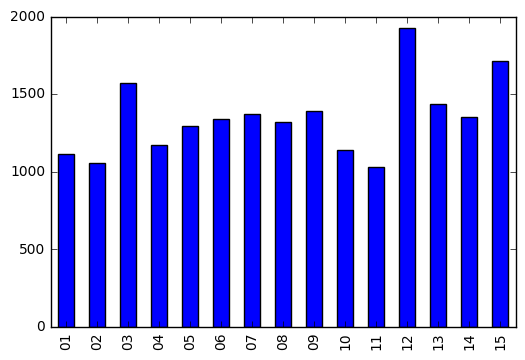

In [110]:
historic_data.sum().plot(kind='bar')

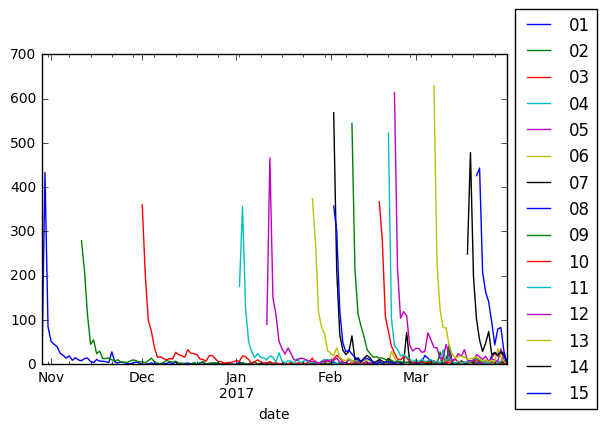

In [114]:
f = plt.figure()
historic_data.plot(legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()